In [20]:
# !pip install pandas-profiling

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [21]:
# Read the CSV file and display the first few rows
df = pd.read_csv('flat-ui__data-Thu Feb 27 2025.csv')
print(f"Gold prices data has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The date range of gold prices available is from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df) - 1]}")
df.head()

Gold prices data has 2304 rows and 2 columns.
The date range of gold prices available is from 1833-01 to 2024-12


,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93


In [22]:
# ตรวจสอบขนาดของ df
print(f"จำนวนแถวของ df: {len(df)}")

# สร้างช่วงวันที่ใหม่ตามจำนวนแถวของ df
date_range = pd.date_range(start='1/1/1833', periods=len(df), freq='M')

# แทนที่คอลัมน์ 'month' ด้วยช่วงวันที่ที่ถูกต้อง
df['month'] = date_range

# ตั้งค่าดัชนีเป็น 'month'
df.set_index('month', inplace=True)

# ตรวจสอบช่วงวันที่ใหม่
print(f"ข้อมูลเริ่มต้น: {df.index.min()}, สิ้นสุด: {df.index.max()}")

df.head()


จำนวนแถวของ df: 2304
ข้อมูลเริ่มต้น: 1833-01-31 00:00:00, สิ้นสุด: 2024-12-31 00:00:00


,Date,Price
month,,
1833-01-31,1833-01,18.93
1833-02-28,1833-02,18.93
1833-03-31,1833-03,18.93
1833-04-30,1833-04,18.93
1833-05-31,1833-05,18.93


<Figure size 2000x800 with 0 Axes>

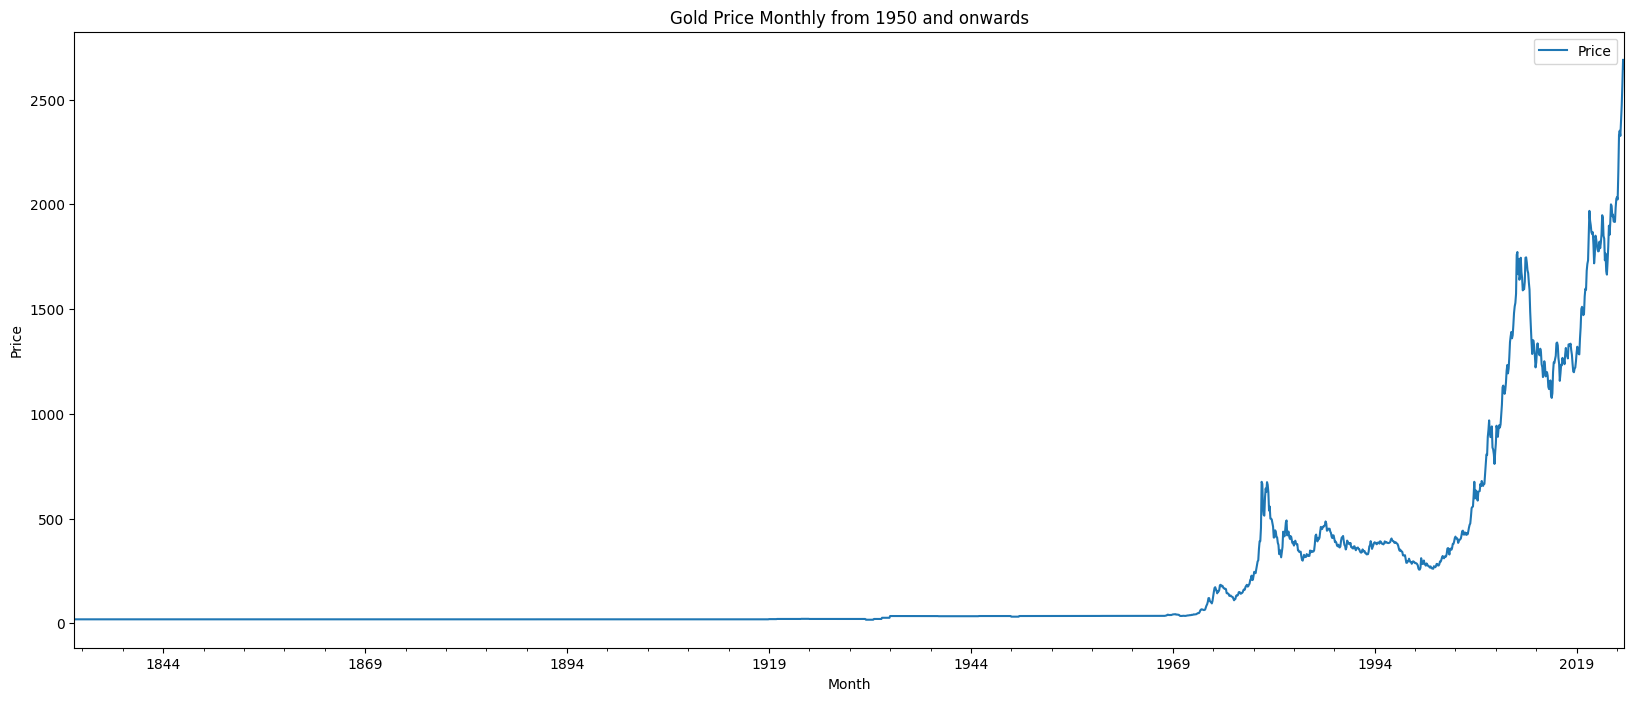

In [23]:
# Plot the gold prices over time
plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly from 1950 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

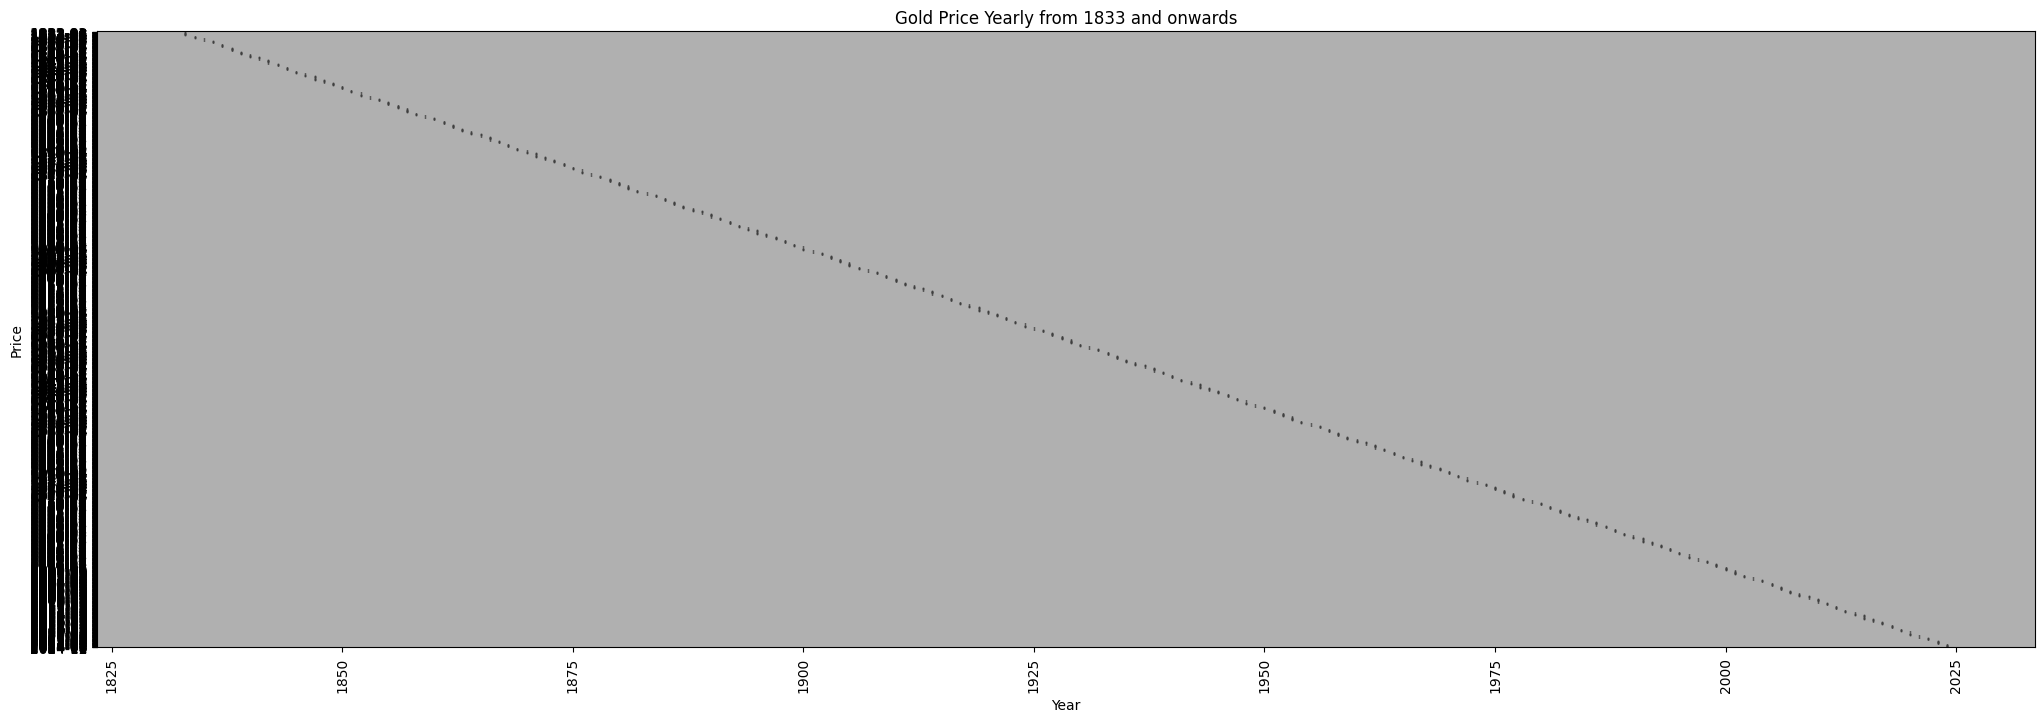

In [24]:
# Create a boxplot of the gold prices by year
plt.figure(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0])
plt.title('Gold Price Yearly from 1833 and onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [25]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count  2304.000000
mean    211.477345
std     431.544935
min      17.060000
25%      18.937500
50%      20.670000
75%     163.067500
max    2690.080000


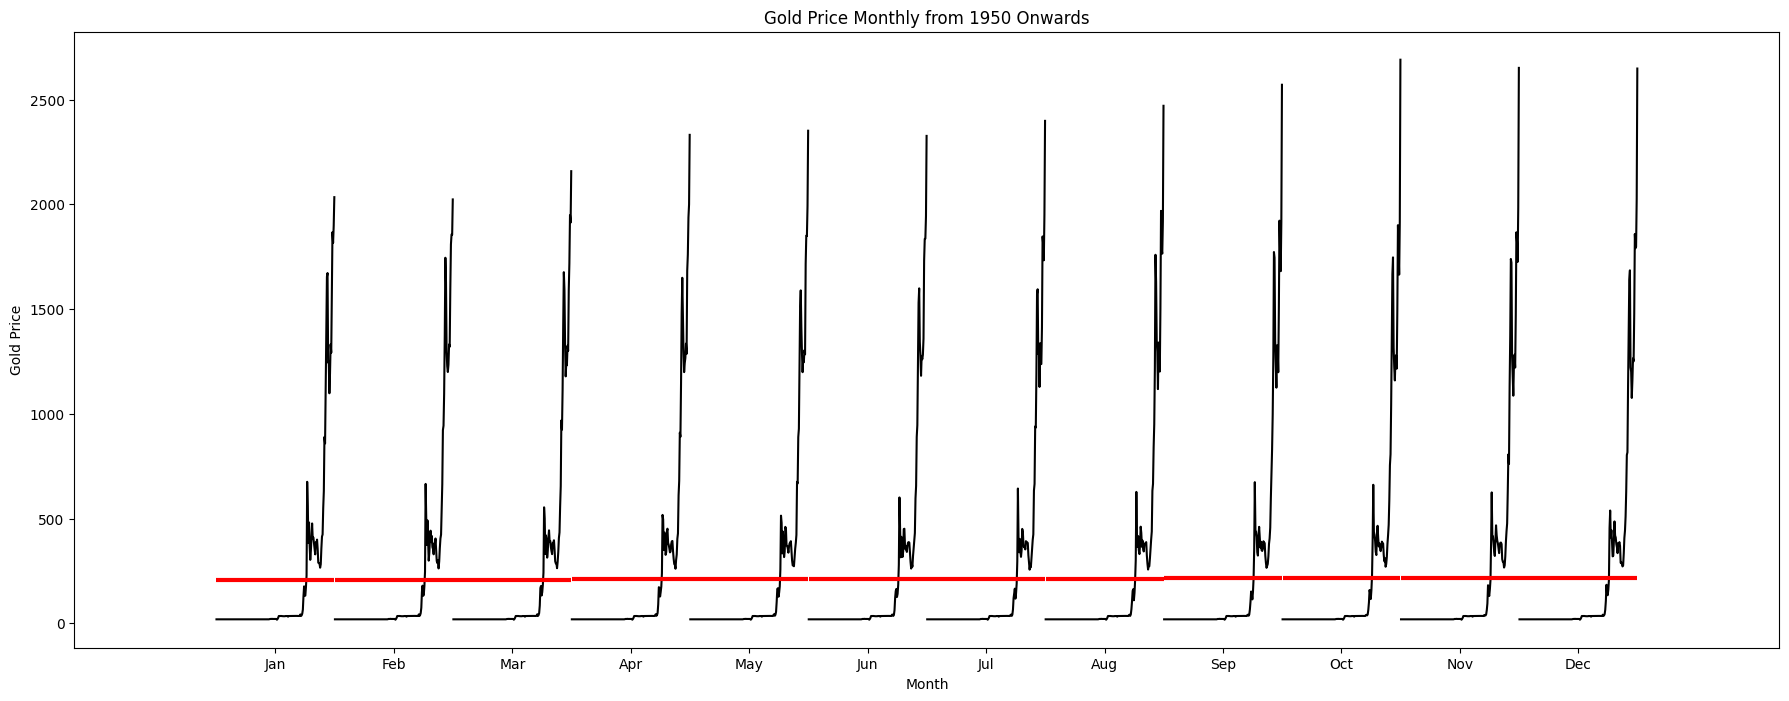

In [26]:
import calendar
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

# ตรวจสอบให้แน่ใจว่าดัชนีเป็น datetime
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# เลือกเฉพาะคอลัมน์ "Price" สำหรับการพล็อต
df_price = df[["Price"]]

# พล็อตข้อมูลรายเดือน
fig, ax = plt.subplots(figsize=(22, 8))
tsaplots.month_plot(df_price, ylabel="Gold Price", ax=ax)

# ตั้งค่าชื่อแกนและชื่อกราฟ
plt.title("Gold Price Monthly from 1950 Onwards")
plt.xlabel("Month")
plt.show()


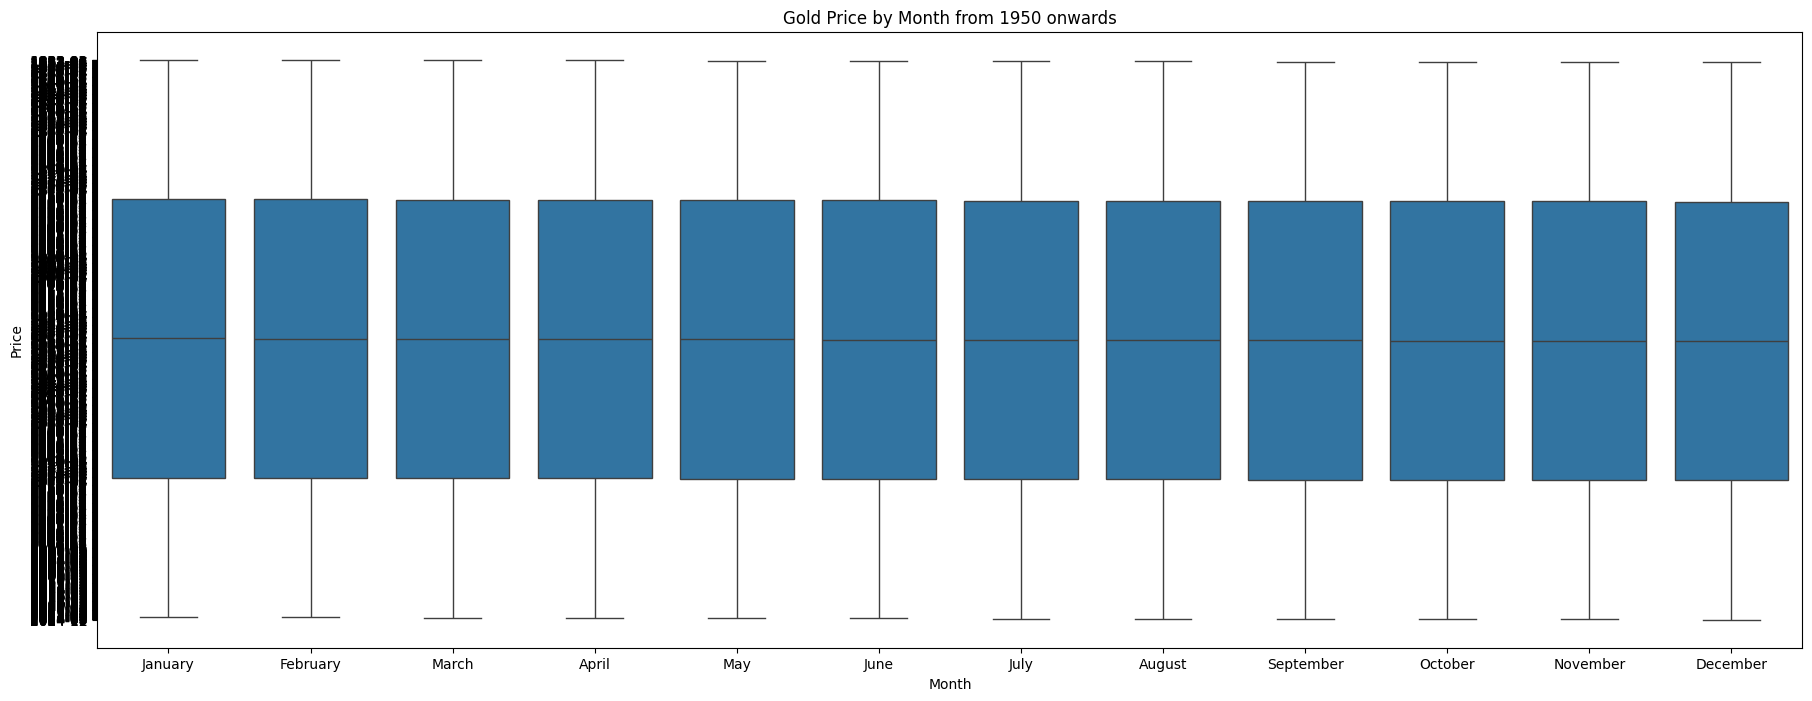

In [27]:
# Create a boxplot of the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold Price by Month from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

Date      object
Price    float64
dtype: object


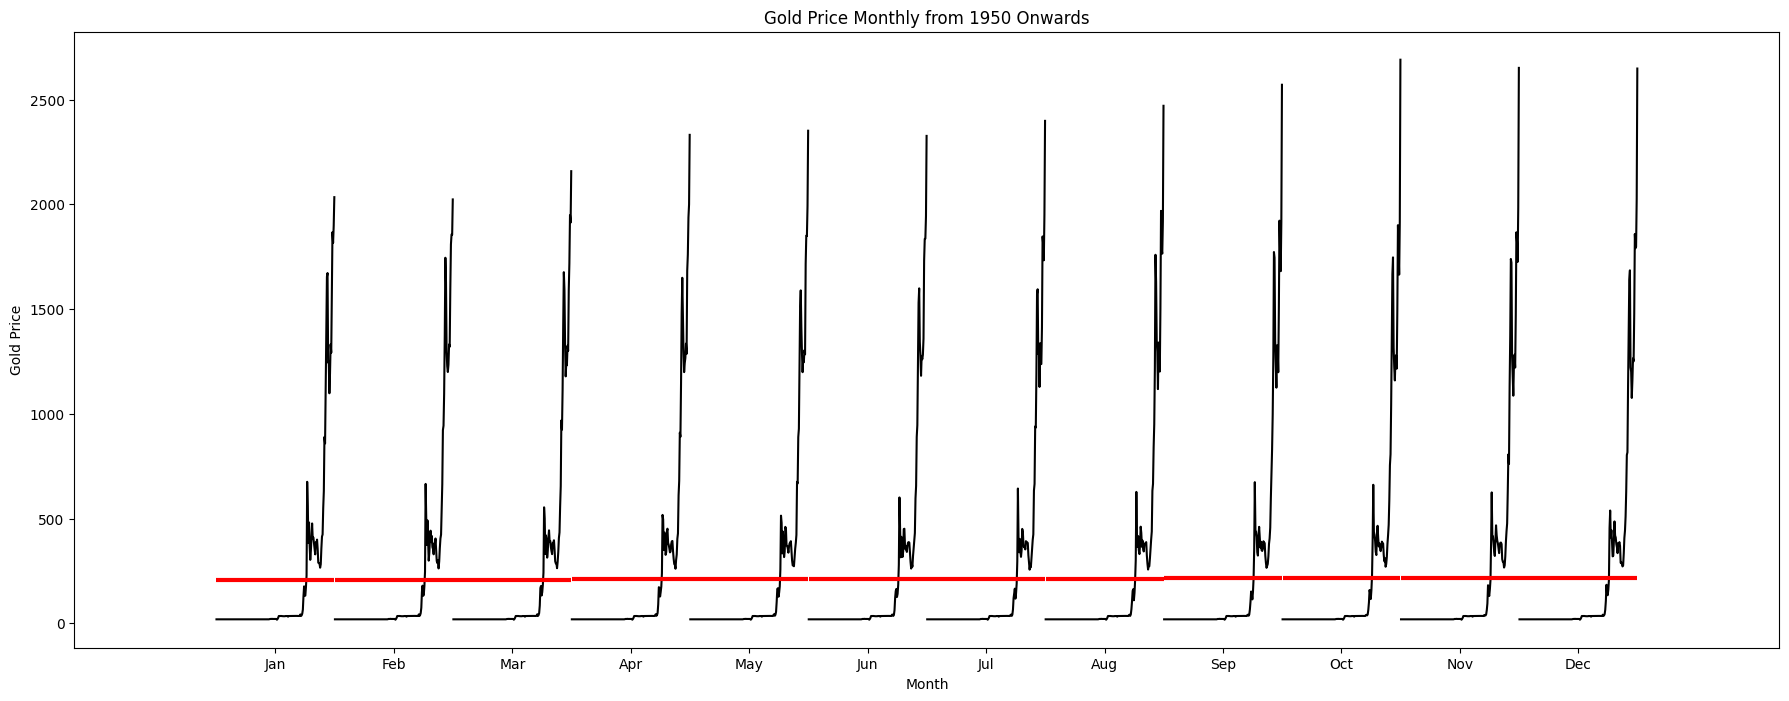

In [29]:
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

# ตรวจสอบประเภทข้อมูลของคอลัมน์ "Price"
print(df.dtypes)

# แปลงคอลัมน์ "Price" ให้เป็นตัวเลข
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# กำจัดค่า NaN ถ้ามี
df.dropna(subset=["Price"], inplace=True)

# เลือกเฉพาะคอลัมน์ "Price" สำหรับการพล็อต
df_price = df[["Price"]]

# พล็อตข้อมูลรายเดือน
fig, ax = plt.subplots(figsize=(22, 8))
tsaplots.month_plot(df_price, ylabel="Gold Price", ax=ax)

# ตั้งค่าชื่อแกนและชื่อกราฟ
plt.title("Gold Price Monthly from 1950 Onwards")
plt.xlabel("Month")
plt.show()


In [30]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count  2304.000000
mean    211.477345
std     431.544935
min      17.060000
25%      18.937500
50%      20.670000
75%     163.067500
max    2690.080000


Date      object
Price    float64
dtype: object
ค่าที่ไม่ใช่ตัวเลขใน 'Price':
Empty DataFrame
Columns: [Date, Price]
Index: []
            Price
month            
1833-01-31  18.93
1833-02-28  18.93
1833-03-31  18.93
1833-04-30  18.93
1833-05-31  18.93


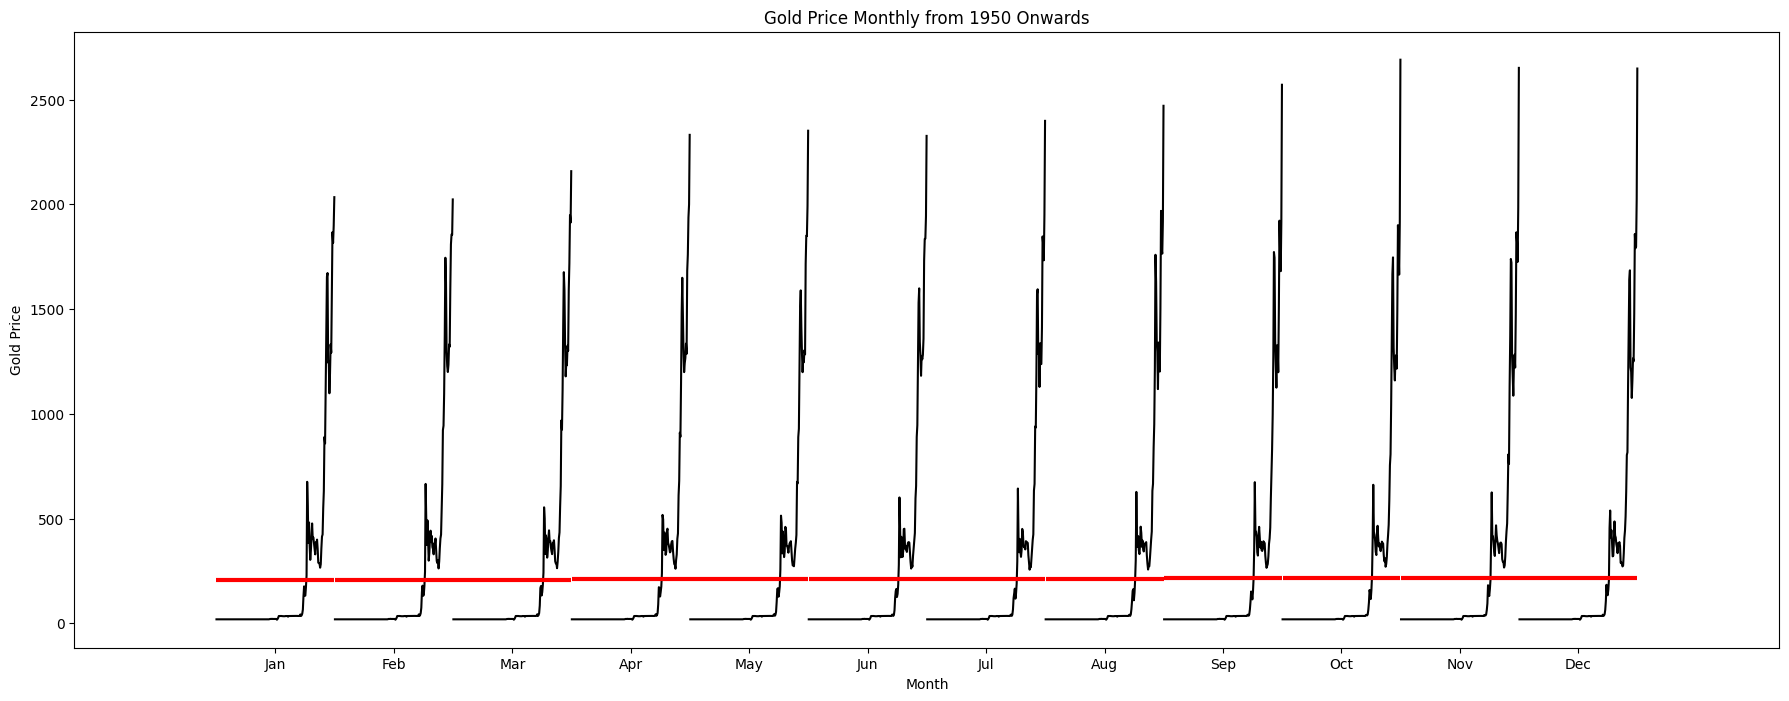

In [32]:
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

# ตรวจสอบประเภทข้อมูลของ df
print(df.dtypes)

# ตรวจสอบค่าที่ไม่ใช่ตัวเลขในคอลัมน์ "Price"
non_numeric_values = df[~df["Price"].astype(str).str.replace(".", "", 1).str.isnumeric()]
print("ค่าที่ไม่ใช่ตัวเลขใน 'Price':")
print(non_numeric_values)

# แปลงคอลัมน์ "Price" ให้เป็นตัวเลข และกำจัดค่าที่ไม่ใช่ตัวเลข
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# ลบค่า NaN (ค่าที่ไม่สามารถแปลงเป็นตัวเลขได้)
df.dropna(subset=["Price"], inplace=True)

# เลือกเฉพาะคอลัมน์ "Price" สำหรับการพล็อต
df_price = df[["Price"]]

# ตรวจสอบว่าข้อมูลพร้อมสำหรับพล็อตหรือไม่
print(df_price.head())

# พล็อตข้อมูลรายเดือน
fig, ax = plt.subplots(figsize=(22, 8))
tsaplots.month_plot(df_price, ylabel="Gold Price", ax=ax)

# ตั้งค่าชื่อแกนและชื่อกราฟ
plt.title("Gold Price Monthly from 1950 Onwards")
plt.xlabel("Month")
plt.show()


In [33]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]


# Check the shape of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Checking for bias in the split
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')

# It is not necessarily biased to split the data this way. 
# However, it may depend on the specific problem and the goals of the analysis. 
# It is always a good practice to carefully consider the split and to test different split ratios to evaluate their impact on the model performance.

Training set shape: (2196, 2)
Testing set shape: (108, 2)
Percentage of data in training set: 95.31 %
Percentage of data in testing set: 4.69 %


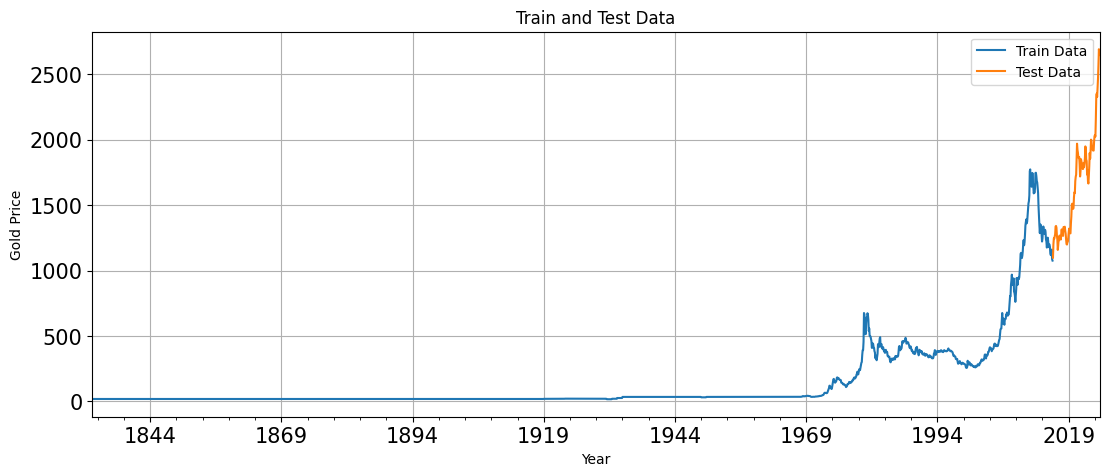

In [34]:
# Plot train and test data
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()


In [35]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

Train time series length: 2196
Test time series length: 108


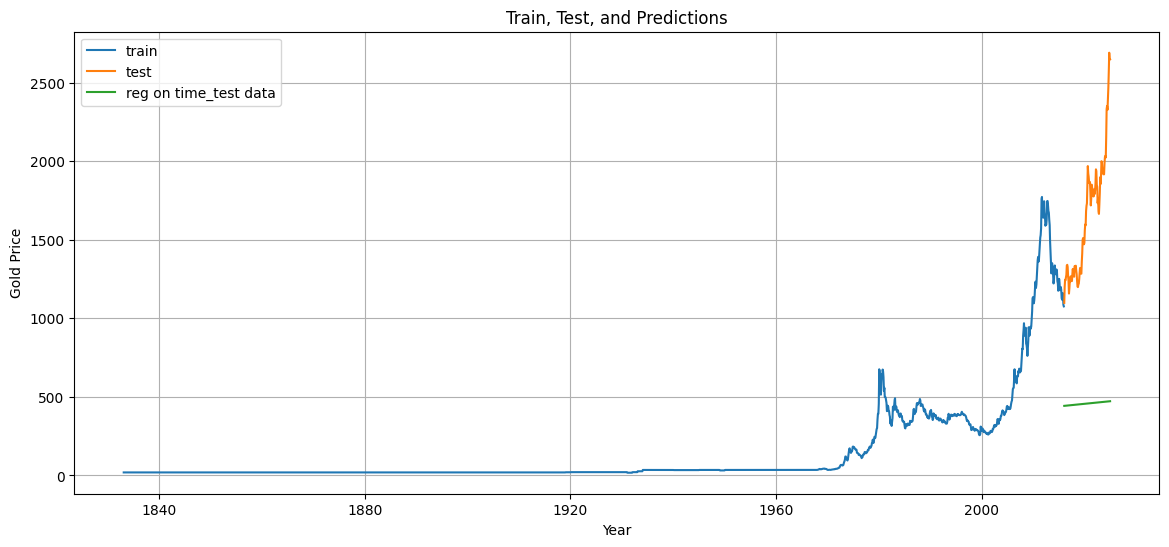

In [37]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

# Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [38]:
def mape(y_true, y_pred):
    """Calculate mean absolute percentage error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")

MAPE for Regression on Time model on test data: 71.005%


In [39]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['Regression on Time'])
results

,Test MAPE (%)
Regression on Time,71.005181


In [40]:
# Create naive model
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['Price']) [len(np.asarray(train['Price'])) - 1]
naive_test['naive'].head()

month
2016-01-31    1075.74
2016-02-29    1075.74
2016-03-31    1075.74
2016-04-30    1075.74
2016-05-31    1075.74
Name: naive, dtype: float64

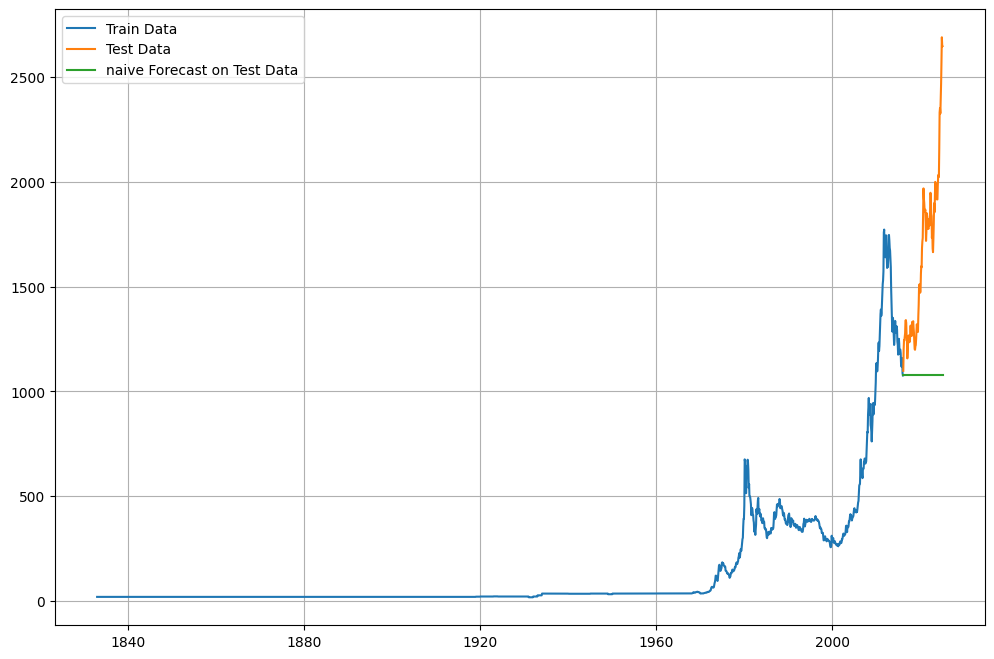

In [41]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='Train Data')
plt.plot(test['Price'], label='Test Data')
plt.plot(naive_test['naive'], label='naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid()

In [42]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

# Display the dataframe with the MAPE results for both models
results

MAPE for naive Forecast model is 31.538%


,Test MAPE (%)
Regression on Time,71.005181
naiveForecast,31.538109


Date      object
Price    float64
dtype: object
ค่าที่ไม่ใช่ตัวเลขใน 'Price':
Empty DataFrame
Columns: [Date, Price]
Index: []
Date      object
Price    float64
dtype: object
               Date  Price  Fitted Values
month                                    
1833-01-31  1833-01  18.93      18.880159
1833-02-28  1833-02  18.93      18.828723
1833-03-31  1833-03  18.93      18.843894
1833-04-30  1833-04  18.93      18.853730
1833-05-31  1833-05  18.93      18.826730


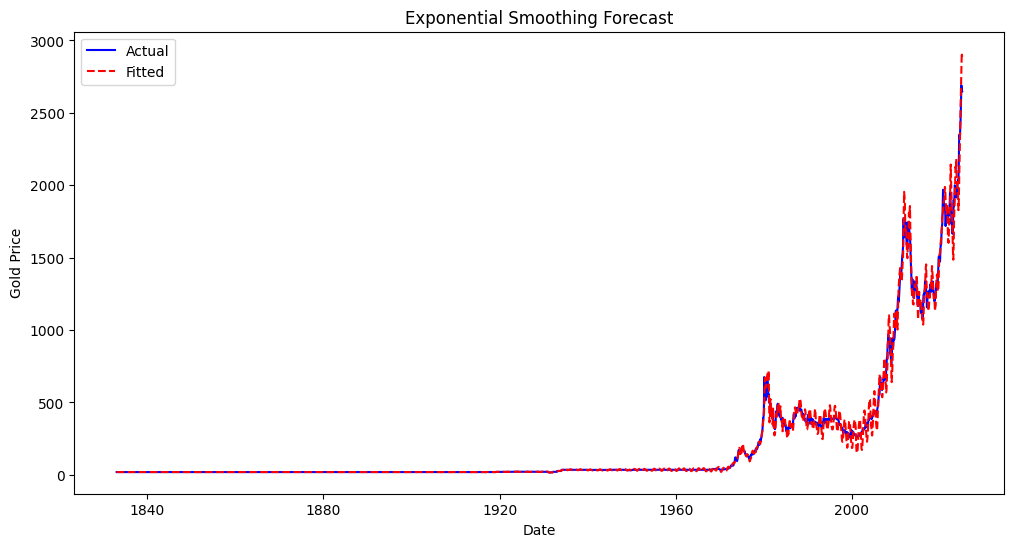

In [44]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ตรวจสอบประเภทข้อมูลของ df
print(df.dtypes)

# แสดงค่าที่ไม่ใช่ตัวเลขในคอลัมน์ "Price"
non_numeric_values = df[~df["Price"].astype(str).str.replace(".", "", 1).str.isnumeric()]
print("ค่าที่ไม่ใช่ตัวเลขใน 'Price':")
print(non_numeric_values)

# แปลงคอลัมน์ "Price" ให้เป็นตัวเลข และกำจัดค่าที่ไม่ใช่ตัวเลข
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# ลบค่า NaN (ค่าที่ไม่สามารถแปลงเป็นตัวเลขได้)
df.dropna(subset=["Price"], inplace=True)

# ตรวจสอบอีกครั้งว่าคอลัมน์ "Price" เป็นตัวเลขแล้ว
print(df.dtypes)

# ดำเนินการใช้ Exponential Smoothing
final_model = ExponentialSmoothing(df["Price"], trend="additive", seasonal="additive", seasonal_periods=12).fit(
    smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6
)

# แสดงค่าพยากรณ์
df["Fitted Values"] = final_model.fittedvalues

# ตรวจสอบข้อมูลหลังจากการพยากรณ์
print(df.head())

# พล็อตผลลัพธ์
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Actual", color="blue")
plt.plot(df.index, df["Fitted Values"], label="Fitted", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()


In [45]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),
    'prediction': prediction,
    'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})
# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True, index_label='Month') 

print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
2025-01-31,2703.919276,2786.598519,2869.277763
2025-02-28,2632.847902,2715.527146,2798.206389
2025-03-31,2657.358899,2740.038142,2822.717386
2025-04-30,2675.095310,2757.774554,2840.453797
2025-05-31,2545.003104,2627.682347,2710.361591
...,...,...,...
2033-08-31,2893.914195,2976.593438,3059.272682
2033-09-30,2954.345419,3037.024663,3119.703906
2033-10-31,3038.150674,3120.829918,3203.509161
2033-11-30,3044.450942,3127.130186,3209.809429


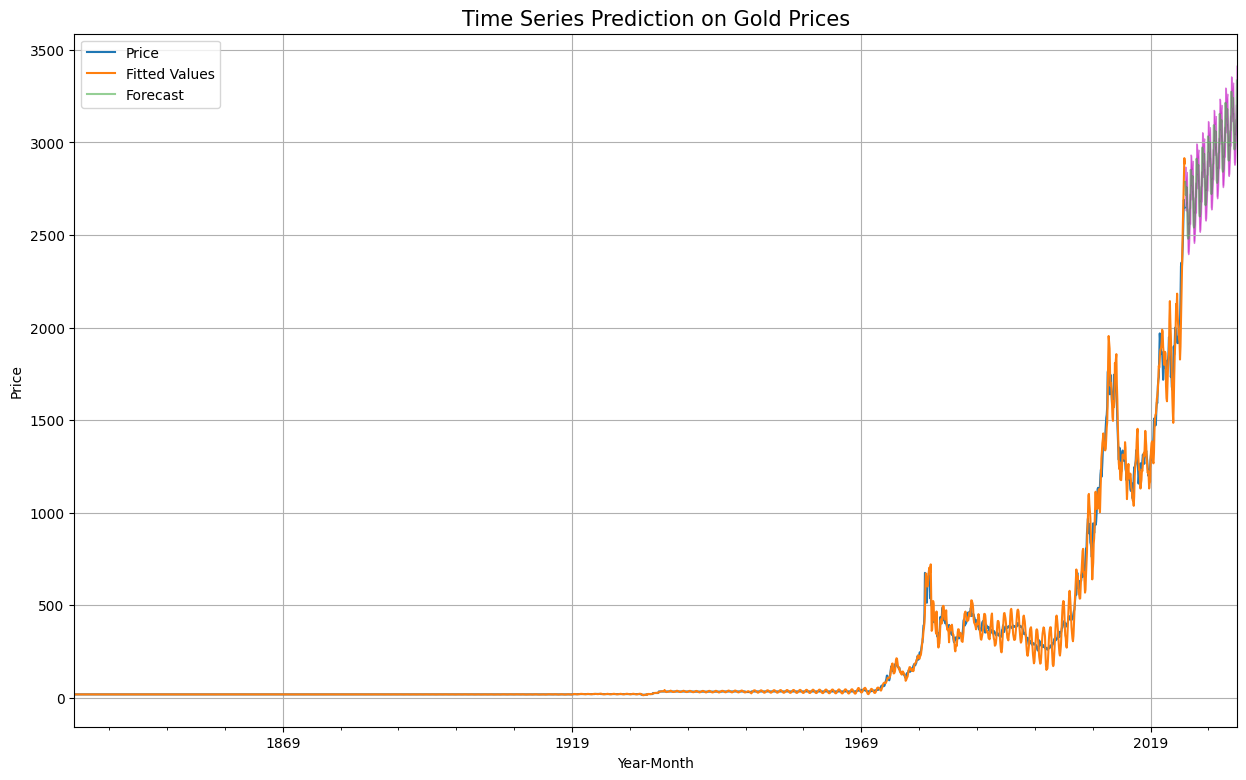

In [47]:
# Plot actual and predicted values with confidence intervals
axis = df.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.5)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.title('Time Series Prediction on Gold Prices',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

## References
- Kaggle Dataset: [Monthly Gold Price](https://www.kaggle.com/datasets/nhiyen/monthly-gold-price)
- Github Repo - [HERE](https://github.com/yennhi95zz/predict-gold-prices)
- Kaggle Project - [HERE](https://www.kaggle.com/nhiyen/time-series-prediction-on-gold-prices)
- Detail Explanation about the code on [MEDIUM]([https://medium.com/@yennhi95zz/unleashing-the-power-of-e-commerce-sales-analysis-a-case-study-4c64871a86ee](https://medium.com/@yennhi95zz/time-series-prediction-on-gold-prices-a826fc2ead0c))